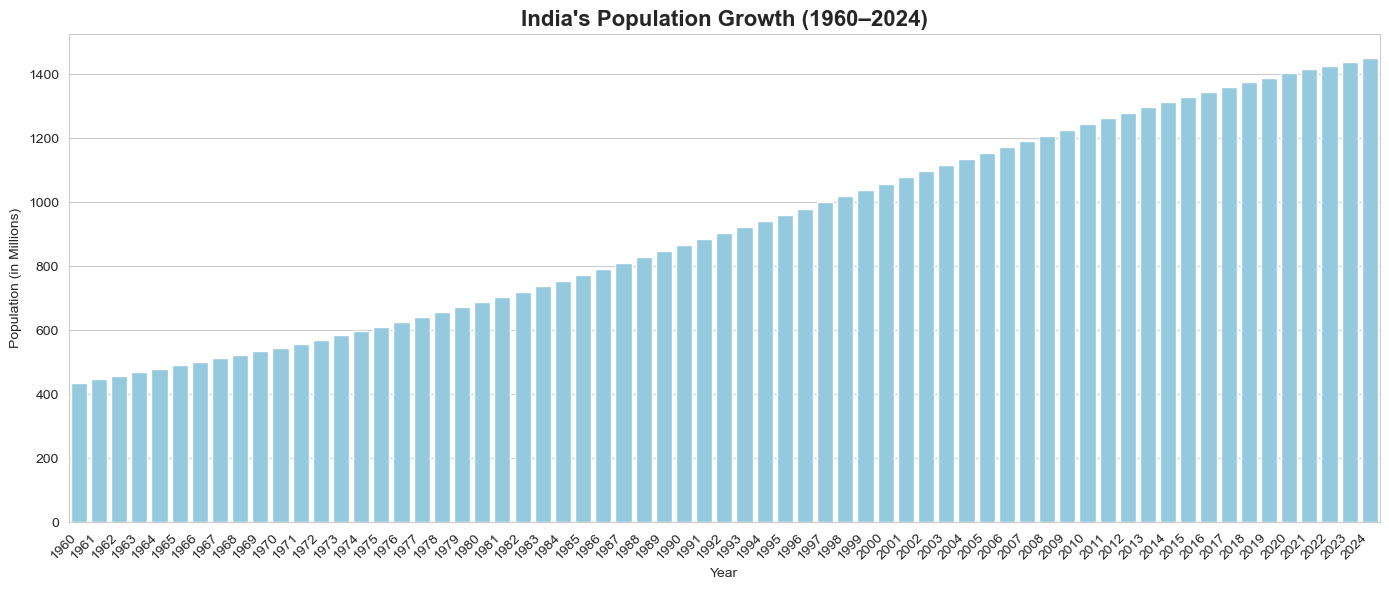

In [1]:
# 📊 India Population Bar Chart (1960–2024)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset (after skipping metadata)
file_path = "API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv"
df = pd.read_csv(file_path, skiprows=4)

# Filter data for India
india_data = df[df["Country Name"] == "India"]

# Extract years and population values
years = india_data.columns[4:-1]  # Years are from column 4 to the second-last
population = india_data.loc[:, years].values.flatten().astype(float) / 1e6  # Convert to Millions

# Set theme
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Plot the data
sns.barplot(x=years, y=population, color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("India's Population Growth (1960–2024)", fontsize=16, weight='bold')
plt.ylabel("Population (in Millions)")
plt.xlabel("Year")
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\vatha\AppData\Local\Temp\ipykernel_17632\2426238580.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country Name", y="Population", data=top10, palette="viridis")


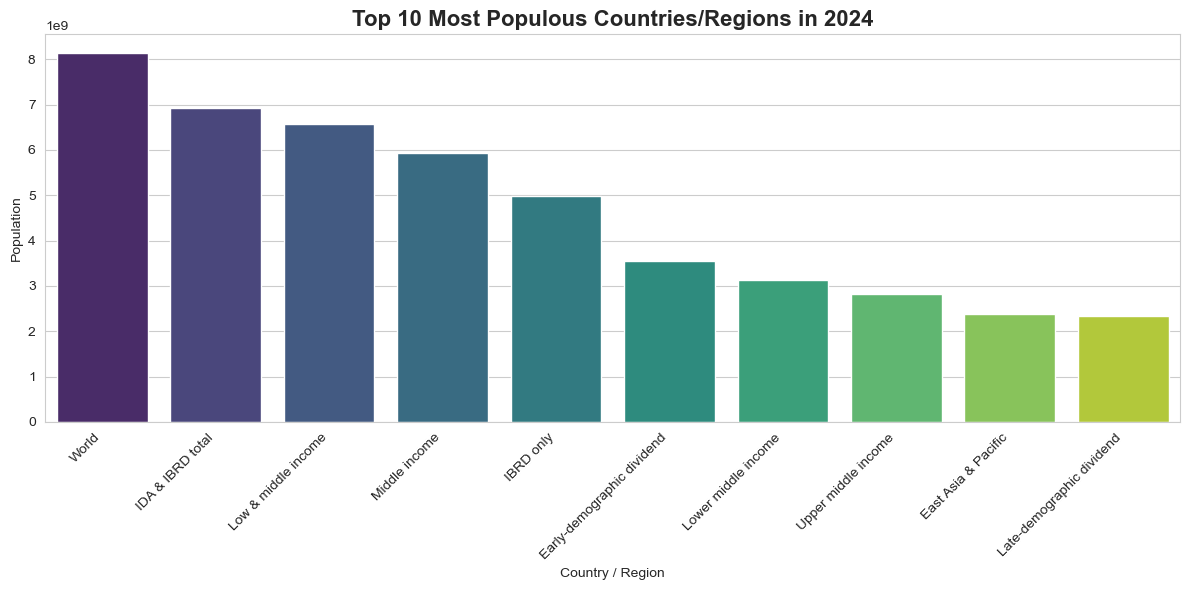

In [5]:
# Load & transform data
df = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv", skiprows=4)
df_long = df.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
                  var_name="Year", value_name="Population")

# Filter for total population & drop NaNs
df_long = df_long[df_long["Indicator Name"] == "Population, total"]
df_long = df_long.dropna(subset=["Population"])

# Convert columns to numeric
df_long["Year"] = pd.to_numeric(df_long["Year"], errors='coerce')
df_long["Population"] = df_long["Population"].astype(float)

# Filter for year 2024 and get top 10
latest_year = 2024
top10 = df_long[df_long["Year"] == latest_year].sort_values(by="Population", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(x="Country Name", y="Population", data=top10, palette="viridis")

# Format plot
plt.title("Top 10 Most Populous Countries/Regions in 2024", fontsize=16, weight='bold')
plt.xlabel("Country / Region")
plt.ylabel("Population")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
